# **INTRODUCTION** **DIABETES** **DATASET**

This is diabetes dataset of female patients as pregnancy column is given in the dataset.

**WHY DIABETES A CHALLENGE**

Rapid industrialization and urbanization lead to lifestyle changes that factor into the increasing rate of diabetes in Asia. Some reasons for this increase may include: limited access to affordable and healthy foods in urban areas. changing preferences for certain types of foods


  **AIM**

*   To perform Exploratory data analysis and feature engineering on diabetes dataset to identify important features for ML algorithms
*   To identify the factors associated with diabetes for future prediction of the disease



# **EXPLORING** **DATA**

## **Reading** **dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
diabetes= pd.read_excel("/content/diabetes.xlsx")
diabetes.head()

,False,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## correction in the name of columns 
diabetes.rename(columns={False:"Pregnancies"," BMI":"BMI"},inplace=True)   

## **Exploring basics**

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes.isnull().sum()      #### calulating null values

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

From basic exploration we came to know that


*   All are numerical variables in the dataset
*   there is one categorical column which is also target variable and is converted already into numerical
*   we have total 768 rows means 768 individual and 9 columns
*   there is no null value in the dataset but there may be some hidden missing values present as 0 or any special character





## **hidden missing value replacement**

In [9]:
columns=diabetes.columns
for i in columns:
  print(i,"\n",diabetes[i].unique())

Pregnancies 
 [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose 
 [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
Blood Pressure 
 [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
Skin Thickness 
 [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  

*  from this unique function we found that there is 0 present in many columns like Glucose, Blood Pressure,Skin Thickness, 'Insulin,BMI which doesn't make sense as this values can not be zero.

* so we will replace the zeros with np.nan and make them   missing values and will further work upon them

In [10]:
column_to_replace_null = ['Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI']
for i in column_to_replace_null:
  diabetes[i] = diabetes[i].replace(0,np.NaN)

In [11]:
diabetes.isnull().sum()

Pregnancies                     0
Glucose                         5
Blood Pressure                 35
Skin Thickness                227
Insulin                       374
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
dtype: int64

##**categorical or target column exploration**

In [12]:
diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

*   there are 500 non diabetic and 268 diabetic 
*   On the basis of diabetic and non-diabetic we will find the mean of all the columns to see weather the values of diabetic differs from non-diabetic or not
*   for that we will group the dataset on the basis of Outcome column and then calculate the mean



In [13]:
numerical_cols=['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'Diabetes Pedigree Function', 'Age']

In [14]:
for i in numerical_cols:
 print(i,"\n\n",diabetes.groupby("Outcome")[i].mean(),"\n")

Pregnancies 

 Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64 

Glucose 

 Outcome
0    110.643863
1    142.319549
Name: Glucose, dtype: float64 

Blood Pressure 

 Outcome
0    70.877339
1    75.321429
Name: Blood Pressure, dtype: float64 

Skin Thickness 

 Outcome
0    27.235457
1    33.000000
Name: Skin Thickness, dtype: float64 

Insulin 

 Outcome
0    130.287879
1    206.846154
Name: Insulin, dtype: float64 

BMI 

 Outcome
0    30.859674
1    35.406767
Name: BMI, dtype: float64 

Diabetes Pedigree Function 

 Outcome
0    0.429734
1    0.550500
Name: Diabetes Pedigree Function, dtype: float64 

Age 

 Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64 



from this we can infer that there is change in mean of almost all the features of diabetic and non-diabetic patients   


*   PLOTTING THE GRAPHS WITH RESPECT TO OUTCOME VARIABLE    
*   here we will plot the graphs of all the numerical columns with outcome variable to see the diffrence in both diabetic and non-diabetic population visually and also to see the distribution of data 



using kde plots we will plot the graphs

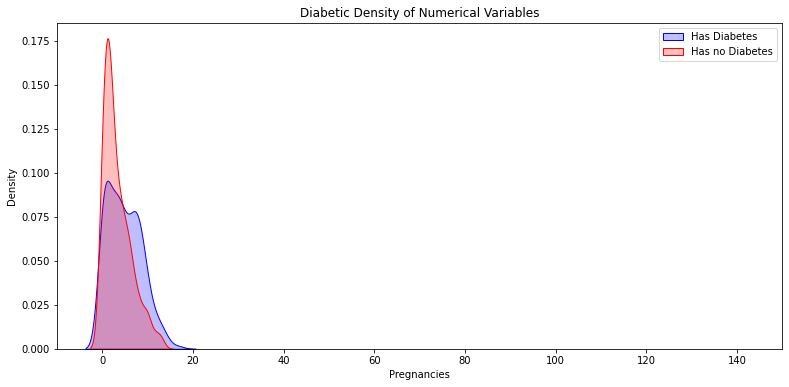

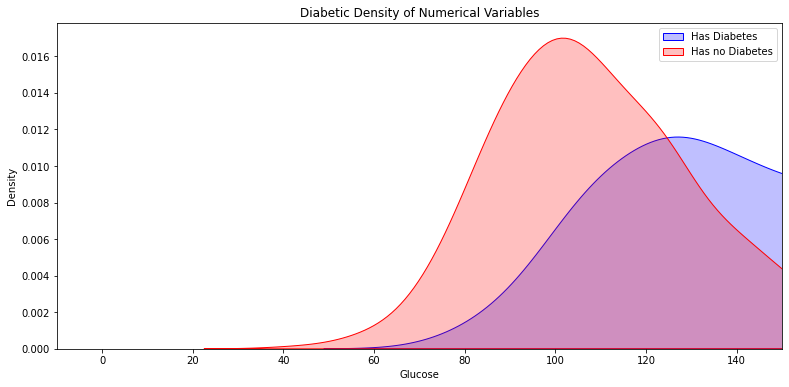

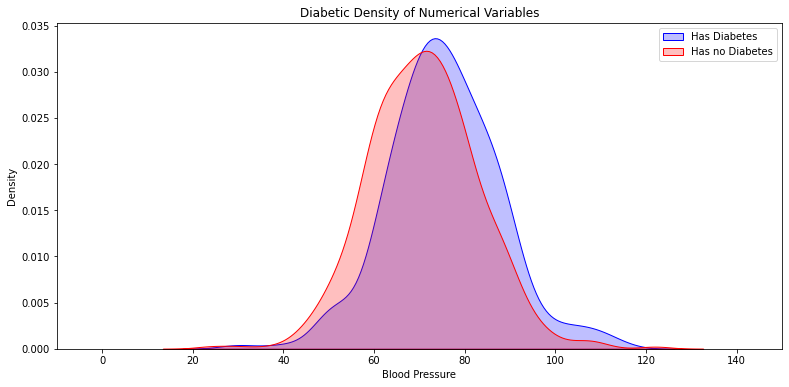

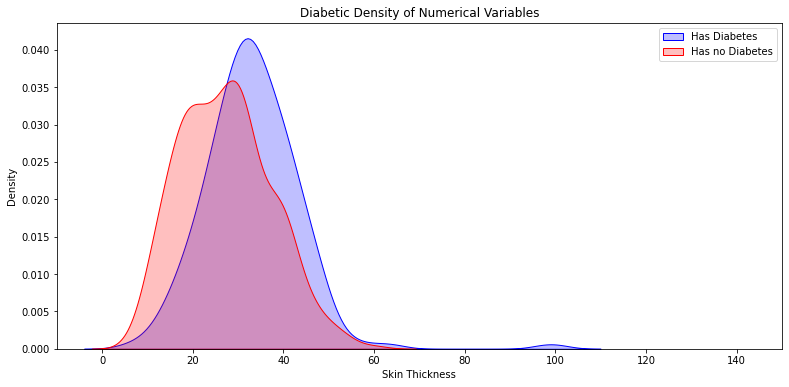

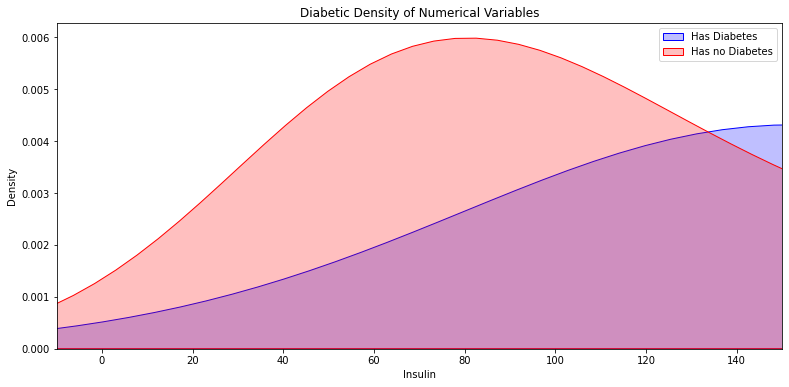

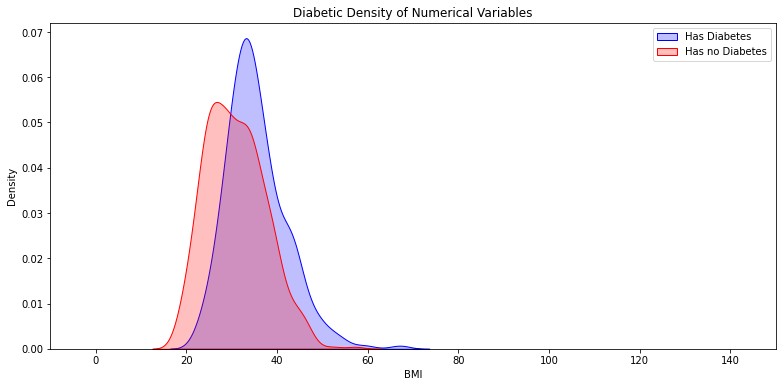

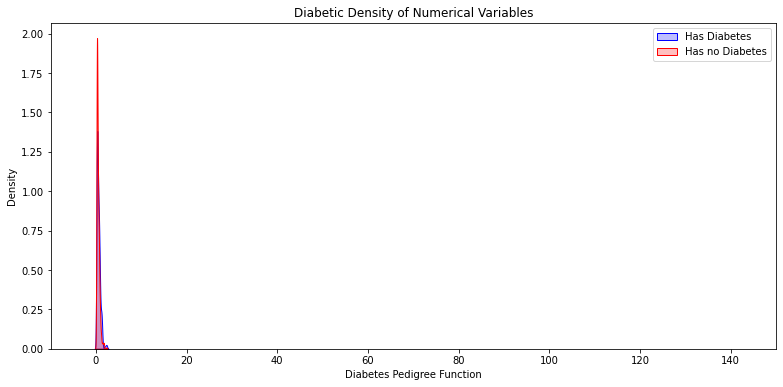

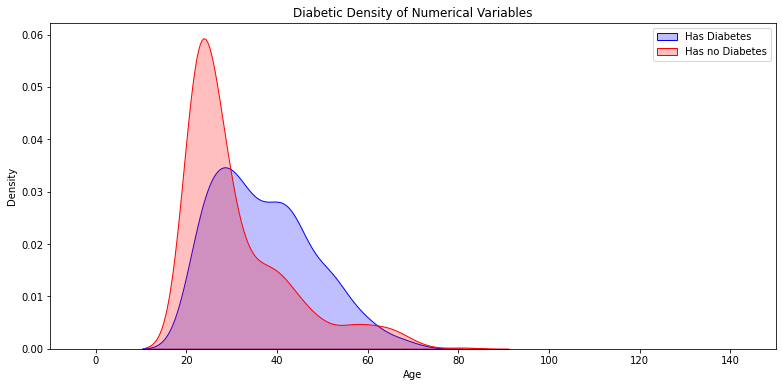

In [15]:
for column in numerical_cols:    #iterating the columns
  plt.figure(figsize=(13,6))    
  sns.kdeplot(diabetes[column][diabetes["Outcome"]==1],color="blue",shade=True)
  sns.kdeplot(diabetes[column][diabetes["Outcome"]==0],color="red",shade=True)
  plt.legend(['Has Diabetes', 'Has no Diabetes'])
  plt.xlim(-10,150)
  plt.title("Diabetic Density of Numerical Variables")
  plt.show()

####observation from the graphs


1. Pregnacies column
 
* the non-diabetic data is normally distributed and mostly lies in the range 0-5.
* the diabetic data is bimodal.
* from here we can see that diabetic population has more number of times pregnant.






2. Glucose column
 
* from here we can see that diabetic population has higher level of  glucose than non-diabetic population

3. blood pressure column
 
* both the data is slightly skewed.
* from here we can alse see that there is not much diffrence in blood pressure of both the population

4. skin thickness column
 
* both the data is skewed.
* from here we can also see that diabetic population has higher skin thickness than non-diabetic 

5. Insulin column
 
* both the data is  skewed.
* from here we can also see that diabetic population has higher insulin values than non-diabetic

6. BMI column
 
* both the data is  skewed.
* from here we can also see that diabetic population has higher BMI values than non-diabetic

7. diabetes pedigree column

* both the data is slightly skewed.
* from here we can alse see that there is not much diffrence in diabetes pedigree function of both the population

8. Age column
 
* both the data is  skewed.
* from here we can also see that diabetic population more lies in the age range of 30-60
* more aged people are having more chances of diabetes 

## **exploring missing values**

In [16]:
diabetes.isnull().sum()

Pregnancies                     0
Glucose                         5
Blood Pressure                 35
Skin Thickness                227
Insulin                       374
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
dtype: int64

we can also plot a graph to see the missing values using missing number library

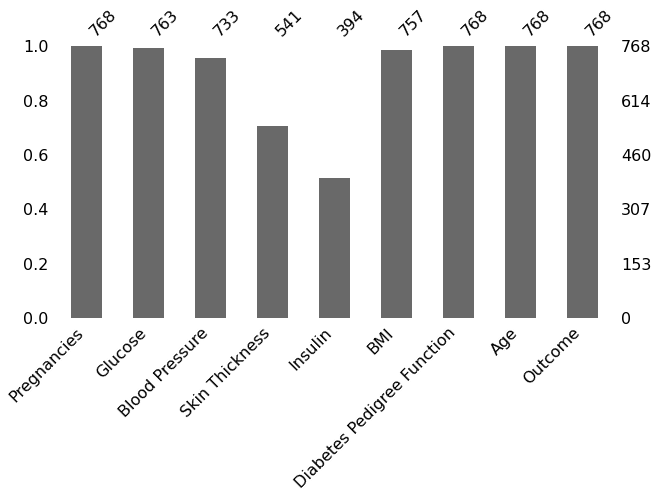

In [17]:
import missingno as msno
msno.bar(diabetes,(10,5))
plt.show()



*  From the bar plot and isnull function we can infer that 5 columns have missing values
*  insulin column have almost 50% data missing but we cannot remove this as we had already visualised using plots and see that insulin is also a factor associated with diabetes so we will fill these using advanced imputation techniques  





## **finding correlation between features**

In [18]:
corr_matrix = diabetes.corr()
corr_matrix

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
Blood Pressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
Skin Thickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
Diabetes Pedigree Function,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


we will see this in a better way using heatmap

In [19]:
#### correlation of all the columns with outcome variable
corr_matrix = diabetes.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                       1.000000
Glucose                       0.494650
BMI                           0.313680
Insulin                       0.303454
Skin Thickness                0.259491
Age                           0.238356
Pregnancies                   0.221898
Diabetes Pedigree Function    0.173844
Blood Pressure                0.170589
Name: Outcome, dtype: float64

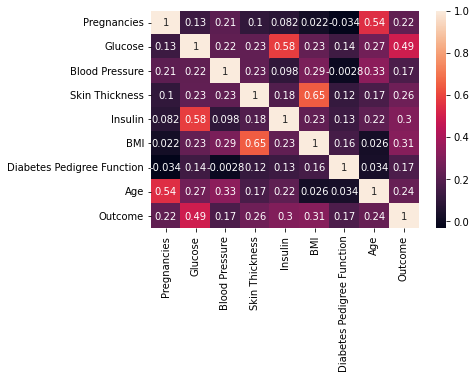

In [20]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

from this we can infer that Glucose insulin and BMI are more correlated with outcome variable

## **filling missing values**

In [21]:
diabetes.isnull().sum()

Pregnancies                     0
Glucose                         5
Blood Pressure                 35
Skin Thickness                227
Insulin                       374
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
dtype: int64

Glucose  , Blood Pressure and BMI has less number of missing values and that data is skewed so we will fill these columns using median

In [22]:
diabetes["Glucose"] = diabetes["Glucose"].fillna(diabetes["Glucose"].median())
diabetes["Blood Pressure"] = diabetes["Blood Pressure"].fillna(diabetes["Blood Pressure"].median())
diabetes["BMI"] = diabetes["BMI"].fillna(diabetes["BMI"].median())

In [23]:
diabetes2=diabetes   ### copying the dataset

skin thickness and insulin column has more missing values so we will use knn imputation for filling these

In [24]:
diabetes.isnull().sum()

Pregnancies                     0
Glucose                         0
Blood Pressure                  0
Skin Thickness                227
Insulin                       374
BMI                             0
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
dtype: int64

In [25]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
diabetes_knn = diabetes.copy(deep=True)
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

In [26]:
### created copy of the dataset as diabetes_knn and checking the final dataset
diabetes_knn.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

#**FEATURE** **ENGINEERING**

## **Outlier** **finding** **and** **transformation** 

checking the outliers using box plot





 Pregnancies 



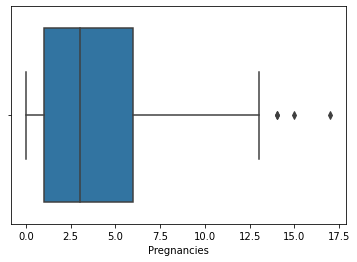


 Glucose 



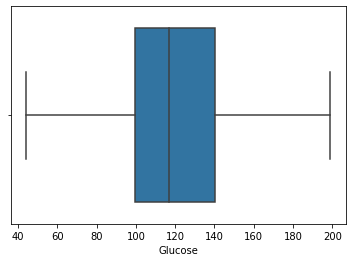


 Blood Pressure 



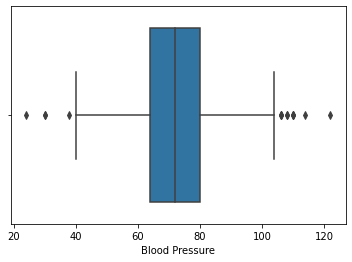


 Skin Thickness 



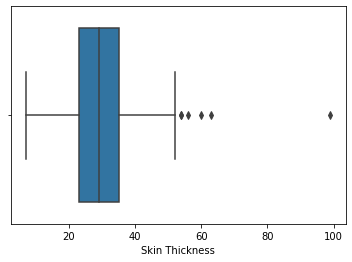


 Insulin 



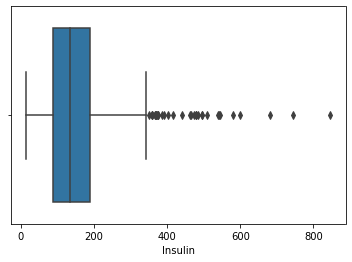


 BMI 



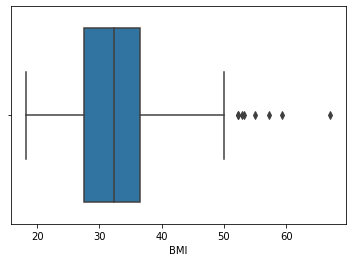


 Diabetes Pedigree Function 



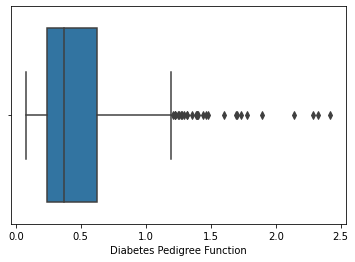


 Age 



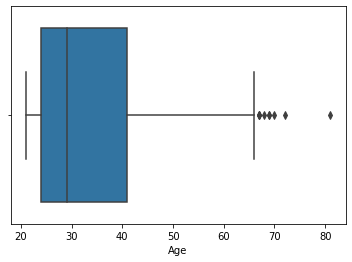

In [27]:
for i in numerical_cols:
  print("\n",i,"\n")
  sns.boxplot(x=diabetes_knn[i])
  plt.plot()
  plt.show()

from these blox plot we can see that there are outliers present in all the columns except glucose column

now, we will transform the data using IQR method

In [28]:
###########    Function for getting upper and lower limit of the columns
def upper_and_lower_limit(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [29]:
#### function for replacing outliers using iqr  
def replace_outliers(dataframe, variable):
    low_limit, up_limit = upper_and_lower_limit(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [30]:
#### replacing the outliers
for i in numerical_cols:
  replace_outliers(diabetes_knn,i)

if we again plot the boxplot and see the outliers are being removed and data is transformed


 Pregnancies 



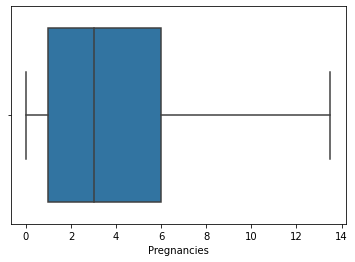


 Glucose 



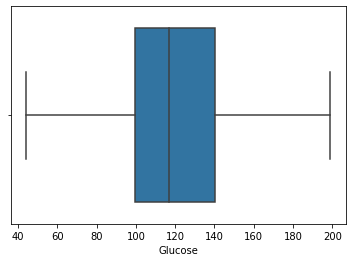


 Blood Pressure 



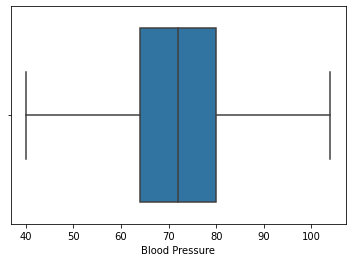


 Skin Thickness 



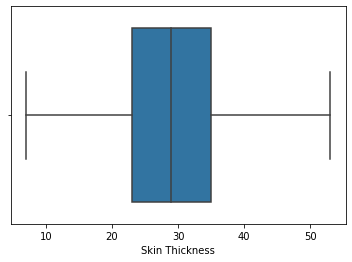


 Insulin 



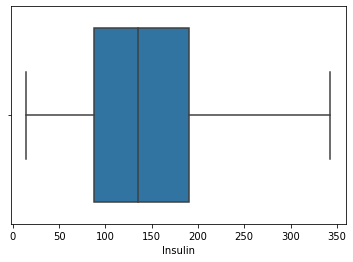


 BMI 



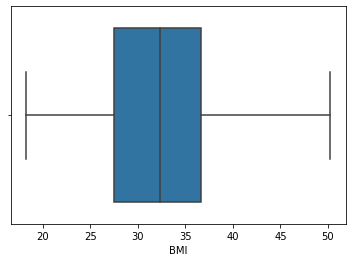


 Diabetes Pedigree Function 



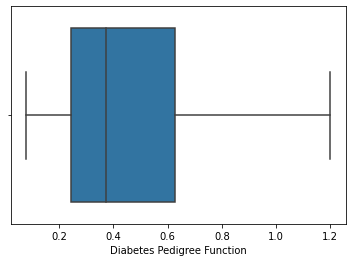


 Age 



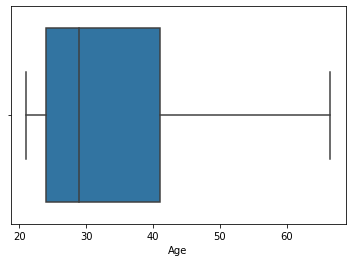

In [31]:
for i in numerical_cols:
  print("\n",i,"\n")
  sns.boxplot(x=diabetes_knn[i])
  plt.plot()
  plt.show()

# **FEATURE** **SCALING**

In [32]:
diabetes_knn.head(1)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0


In [33]:
#### creating X and Y variables    
X = diabetes_knn.iloc[:, :-1]
X

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0


In [34]:
Y = diabetes_knn.iloc[:,-1]
Y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

## **splitting** **the** **data**

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [37]:
X_train
#print(y_train)
#print(X_test)
#print(y_test)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
663,9.0,145.0,80.0,46.0,130.0,37.9,0.637,40.0
712,10.0,129.0,62.0,36.0,177.4,41.2,0.441,38.0
161,7.0,102.0,74.0,40.0,105.0,37.2,0.204,45.0
509,8.0,120.0,78.0,22.0,273.8,25.0,0.409,64.0
305,2.0,120.0,76.0,37.0,105.0,39.7,0.215,29.0
...,...,...,...,...,...,...,...,...
645,2.0,157.0,74.0,35.0,343.0,39.4,0.134,30.0
715,7.0,187.0,50.0,33.0,343.0,33.9,0.826,34.0
72,13.0,126.0,90.0,31.4,125.6,43.4,0.583,42.0
235,4.0,171.0,72.0,42.4,323.8,43.6,0.479,26.0


## **standardization**

In [38]:
numerical_cols

['Pregnancies',
 'Glucose',
 'Blood Pressure',
 'Skin Thickness',
 'Insulin',
 'BMI',
 'Diabetes Pedigree Function',
 'Age']

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[numerical_cols] = sc.fit_transform(X_train[numerical_cols])

X_test[numerical_cols] = sc.transform(X_test[numerical_cols])

In [40]:
X_train.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
663,1.521999,0.760346,0.648365,1.958904,-0.240869,0.870334,0.659673,0.573346
712,1.818292,0.235313,-0.856092,0.825565,0.357277,1.369223,-0.035412,0.402849
161,0.929414,-0.650679,0.146879,1.278901,-0.556347,0.764510,-0.875896,0.999590
509,1.225706,-0.060017,0.481203,-0.761109,1.573761,-1.079867,-0.148895,2.619316
305,-0.552050,-0.060017,0.314041,0.938899,-0.556347,1.142456,-0.836887,-0.364390


In [41]:
X_train.shape

(614, 8)

In [42]:
X_test.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
285,0.929414,0.465015,0.146879,-0.307773,-0.177773,-0.928688,0.695137,1.511082
101,-0.848343,0.957233,-1.023254,-0.330440,1.278474,-0.913571,-0.964555,-0.961131
581,0.633121,-0.420977,-1.023254,-0.194440,-0.387251,-1.079867,-0.868804,-0.534887
352,-0.255758,-1.996076,0.815527,-0.081106,-1.210018,0.341210,-0.737589,1.084839
726,-0.848343,-0.191276,0.481203,0.032228,0.390087,0.598213,0.159638,-0.705385


In [43]:

X_test.shape

(154, 8)

In [44]:
y_train.head()

663    1.0
712    1.0
161    0.0
509    0.0
305    0.0
Name: Outcome, dtype: float64

In [45]:
y_train.shape

(614,)

In [46]:
y_test.head()

285    0.0
101    0.0
581    0.0
352    0.0
726    0.0
Name: Outcome, dtype: float64

In [47]:
y_test.shape

(154,)

# **CONCLUSION**

In case of diabetes 
 Glucose , insulin and BMI are the important factors associated with the disease. where as age is also a important factor.

The important features are being selected and are ready for the machine learning algorithms